In [ ]:
# disable GPU since VM has no passthrough
import os

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

try:  # not import, not whitespace
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
    from tensorflow import keras
    import tensorflow as tf
except ImportError:
    pass

## Load the data

In [2]:
data = pd.read_csv('../data/Regression_Ruhr.csv', sep=';')

## Shift the runoff and drop na

In [3]:
data['Abfluss[Q]'] = data['Abfluss[Q]'].shift(-1)
data = data.dropna()

## Divide into x and y

In [4]:
x = data.iloc[:, 2:]
y = data.iloc[:, 1]

## Divide into train test

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
)

## Create normalisation layer

In [ ]:
norm_layer = tf.keras.layers.experimental.preprocessing.Normalization()
norm_layer.adapt(x_train)

## Create model

In [ ]:
model = keras.models.Sequential()
model.add(norm_layer)
model.add(
    keras.layers.Dense(
        64,
        activation='sigmoid',
        input_shape=(x_train.shape[1],),
    ),
)
model.add(
    keras.layers.Dense(
        128,
        activation='sigmoid',
        input_shape=(x_train.shape[1],),
    ),
)
model.add(keras.layers.Dense(1, input_shape=(x_train.shape[1],)))

optimizer = keras.optimizers.SGD(learning_rate=0.002)
model.compile(optimizer=optimizer, loss='mean_squared_error')

history = model.fit(x_train, y_train, epochs=1000)

In [8]:
history.history['loss'][-1]

28.78748893737793

## Plot loss

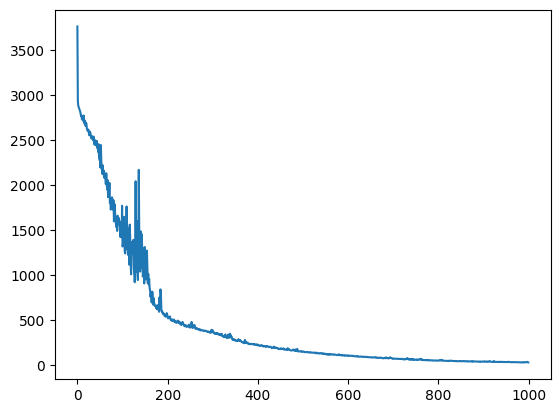

In [9]:
plt.plot(history.history['loss'])

## compare predicted vs. actual

In [10]:
pos = 10
point = x_test.iloc[pos].values.reshape(1, -1)
predicted = model.predict(point)[0][0]
actual = y_test.iloc[pos]
print(f'predicted:  {predicted:.1f}, but actually it was: {actual}')

1/1 [==============================] - 0s 109ms/step
predicted:  46.3, but actually it was: 52.2
